## CSC 271 - Intro to Data Science
## Thurs, Feb 13
## Lesson 07
## Pandas -- working with **Series** and **DataFrame** types.

**Task 1:** Series is a 1-d data type provided by Pandas.  There are a lot of similarities to other 1-d types like lists, arrays, dictionaries, etc.  But there are also important distinctions and tools designed for Series.  Let's explore some of the basics.    

https://pandas.pydata.org/docs/reference/series.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# create a Series from a list
x = [44,23,87,20,89]
s = pd.Series(x)

s

0    44
1    23
2    87
3    20
4    89
dtype: int64

In [4]:
# create a Series from an array
x = np.random.rand(5)
s = pd.Series(x)

s

0    0.566572
1    0.925904
2    0.662923
3    0.343069
4    0.274210
dtype: float64

In [6]:
# create a Series from a dictionary
x = {'one':'eins',
'two':'zwei',
'three':'drei',
'four':'vier', 
'five':'fünf',
'six':'sechs',
'seven':'sieben', 
'eight':'acht'}

s = pd.Series(x)
print(s)
s['eight']

one        eins
two        zwei
three      drei
four       vier
five       fünf
six       sechs
seven    sieben
eight      acht
dtype: object


'acht'

In [7]:
# here's a big difference to these other structures ...

s1 = pd.Series(['A','B','C'])
s2 = pd.Series([101,202,303,404,505])

s3 = pd.concat([s1,s2])  # <-- combine to a single series

print('all of s3')
print(s3)

print('\nvalues associated with index 1')
print(s3[1])

all of s3
0      A
1      B
2      C
0    101
1    202
2    303
3    404
4    505
dtype: object

values associated with index 1
1      B
1    202
dtype: object


In [8]:
# modify a Series on the fly

s=pd.Series(['Value'],index=['Owner'],dtype=object)

for i in range(1000):
    if np.random.rand()<0.5:
        name = 'John'
    else:
        name = 'Mary'

    update = pd.Series([np.random.randint(40,100)],index=[name])
    s=pd.concat([s,update])

print(s[0:10])  # <-- note default indexing 0,1,2,... also works 

Owner    Value
Mary        81
John        52
Mary        46
Mary        90
Mary        95
John        56
John        69
Mary        89
Mary        86
dtype: object


In [9]:
s['Mary']

Mary    81
Mary    46
Mary    90
Mary    95
Mary    89
        ..
Mary    67
Mary    71
Mary    93
Mary    57
Mary    65
Length: 514, dtype: object

In [10]:
print('m count ',len(s['Mary']))
print('j count ',len(s['John']))
print('\n')
print('m total ',np.sum(s['Mary']))
print('j total ',np.sum(s['John']))

m count  514
j count  486


m total  35577
j total  32894


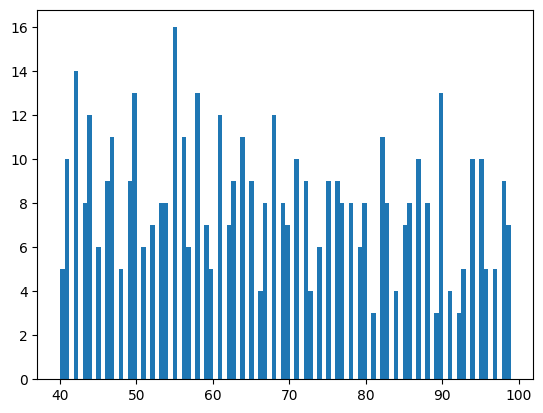

<Axes: ylabel='Frequency'>

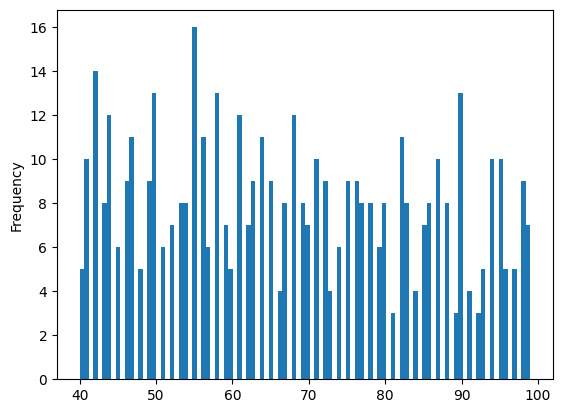

In [ ]:
# there are also a lot of graphics tools available in Pandas

#using matplotlib
plt.hist(s['John'],bins=100)
plt.show()

#using Pandas
s['John'].plot.hist(bins=100) #pandas also has graphics

## Class Exercises (part 1):

(1) Create a Series object for the following data that summarizes the number of sales for four weeks:

>(a) Write code to display sales for Mondays only.  

>(b) Write code to compute the total sales for all Mondays.

>(c) Write code to display only data on sales with 15 or fewer sales.  

>(d) Create a new **Series** for the daily profit if there are fixed costs of $\$200/day$ and each sale nets $\$15$.
  



In [ ]:
sales_list=[22,12,14,30,26,19,13,15,27,28,19,12,16,18,22,21,10,13,18,24]
day_list=['M','Tu','W','Th','F','M','Tu','W','Th','F','M','Tu','W','Th','F','M','Tu','W','Th','F']

sales_s = pd.Series(sales_list,index=day_list)

print(sales_s)

sales_s.plot.bar();  # <-- plotting tools from Pandas

M    22
M    19
M    19
M    21
dtype: int64
81
[22 12 14 30 26 19 13 15 27 28 19 12 16 18 22 21 10 13 18 24]
[np.int64(12), np.int64(14), np.int64(13), np.int64(12), np.int64(10), np.int64(13)]


<Axes: >

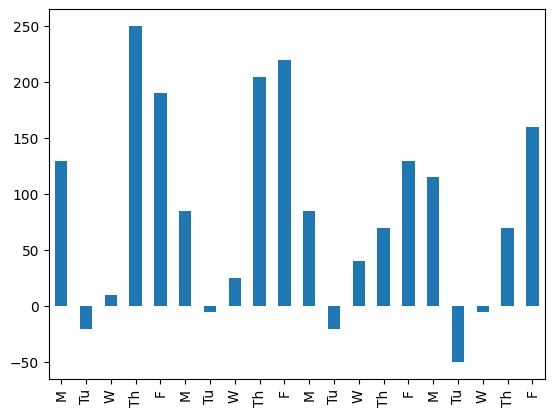

In [39]:
#Question 1
print(sales_s["M"])
total = np.sum(sales_s["M"])
print(total) #the total sums

#Question 2
sales = sales_s.values
print(sales)
sales_15 = [x for x in sales if x < 15]
print(sales_15)

#Question 3
(sales_s *15-200).plot.bar()

---

## Quick Trivia Question -- What is the most popular and most widely used computational data analytics tool in the world?  

---

**Task 2:** The **DataFrame** type in Pandas is a data analysis workhorse.  We will use it a lot!  It is a very flexible container for data of many shapes and sizes ... and there are *many* tools associated with DataFrame objects.  

https://pandas.pydata.org/docs/reference/frame.html

In [40]:
# Let's try out a simple df created from a list of lists 

lst=[[2,3,8,5,8,5],[92,86,61,70,19,10],[133,242,623,151,685,298],[2784,1280,7313,5622,1028,6676]]
df = pd.DataFrame(lst)

df

,0,1,2,3,4,5
0,2,3,8,5,8,5
1,92,86,61,70,19,10
2,133,242,623,151,685,298
3,2784,1280,7313,5622,1028,6676


In [41]:
print(df[0]) # <-- CAUTION! By column, not row!  

0       2
1      92
2     133
3    2784
Name: 0, dtype: int64


In [42]:
# Note how Pandas uses types ... each column of a DataFrame is a Series!
print(type(df))
print(type(df[0]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [43]:
# an important operation -- Transpose
new_df = df.T

new_df

,0,1,2,3
0,2,92,133,2784
1,3,86,242,1280
2,8,61,623,7313
3,5,70,151,5622
4,8,19,685,1028
5,5,10,298,6676


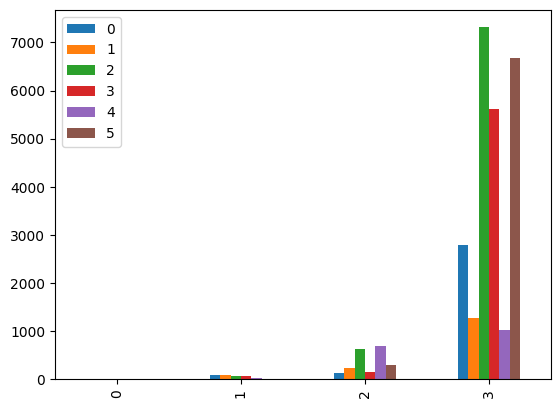

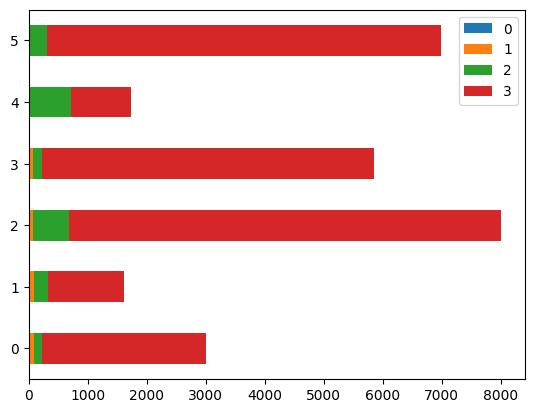

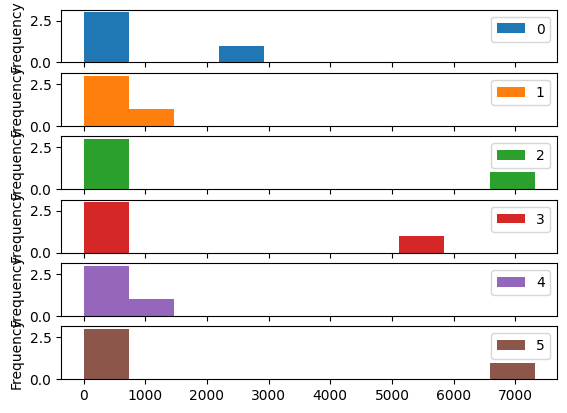

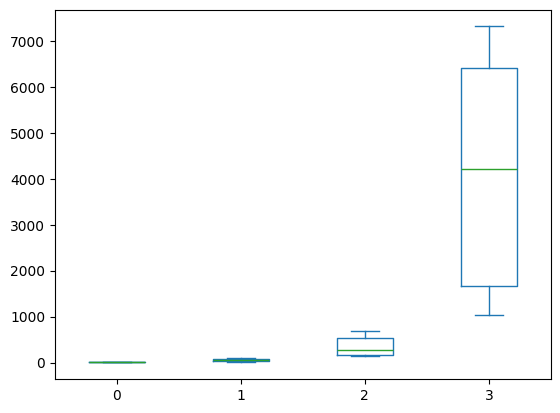

In [46]:
# And there are tons of built in tools...
df.plot.bar();
df.T.plot.barh(stacked=True);
df.plot.hist(subplots=True)
df.T.plot.box();

In [47]:
# Let's try a DataFrame constructed from a dictionary

data ={
'Beta':[3,5,2,8],
'Delt':[2,1,3,2],
'PhiPsi':[9,3,2,5],
'Fiji':[4,0,5,6],
'TKE':[3,7,2,1],  
}

greek_df = pd.DataFrame(data,index=['week 1','week 2','week 3','week 4'])

greek_df

,Beta,Delt,PhiPsi,Fiji,TKE
week 1,3,2,9,4,3
week 2,5,1,3,0,7
week 3,2,3,2,5,2
week 4,8,2,5,6,1


In [48]:
# We can use array index notation for defining slices
# and/or subsets of dataframes using the iloc function

greek_df.iloc[2:,0:3]

,Beta,Delt,PhiPsi
week 3,2,3,2
week 4,8,2,5


In [49]:
# sort by column

greek_df.sort_values(by='Beta')

,Beta,Delt,PhiPsi,Fiji,TKE
week 3,2,3,2,5,2
week 1,3,2,9,4,3
week 2,5,1,3,0,7
week 4,8,2,5,6,1


In [50]:
# Let's look at an example of a df created from list of dictionaries

monon_data=[
{'Year':1890, 'Winner':'DePauw', 'Score':[34,5]},
{'Year':1891, 'Winner':'DePauw', 'Score':[1,0]},
{'Year':1892, 'Winner':'DePauw', 'Score':[42,4]},
{'Year':1893, 'Winner':'DePauw', 'Score':[48,34]},
{'Year':1894, 'Winner':'Wabash', 'Score':[16,4]},
{'Year':1895, 'Winner':'Wabash', 'Score':[6,0]},
{'Year':1896, 'Winner':'DePauw', 'Score':[20,0]},
{'Year':1900, 'Winner':'Wabash', 'Score':[6,0]},
{'Year':1900, 'Winner':'DePauw', 'Score':[26,11]},
{'Year':1901, 'Winner':'DePauw', 'Score':[31,2]},
{'Year':1901, 'Winner':'DePauw', 'Score':[35,5]},
{'Year':1903, 'Winner':'Wabash', 'Score':[10,0]},
{'Year':1905, 'Winner':'Wabash', 'Score':[52,0]},
{'Year':1906, 'Winner':'Wabash', 'Score':[7,0]},
{'Year':1907, 'Winner':'Wabash', 'Score':[11,4]},
{'Year':1908, 'Winner':'Wabash', 'Score':[12,0]},
{'Year':1909, 'Winner':'Tie', 'Score':[0,0]},
{'Year':1911, 'Winner':'Tie', 'Score':[0,0]},
{'Year':1912, 'Winner':'Wabash', 'Score':[62,0]},
{'Year':1913, 'Winner':'DePauw', 'Score':[7,0]},
{'Year':1914, 'Winner':'DePauw', 'Score':[3,0]},
{'Year':1915, 'Winner':'Wabash', 'Score':[34,0]},
{'Year':1916, 'Winner':'Wabash', 'Score':[26,13]},
{'Year':1917, 'Winner':'DePauw', 'Score':[7,0]},
{'Year':1918, 'Winner':'DePauw', 'Score':[28,6]},
{'Year':1919, 'Winner':'Tie', 'Score':[0,0]},
{'Year':1920, 'Winner':'DePauw', 'Score':[3,0]},
{'Year':1921, 'Winner':'Wabash', 'Score':[22,0]},
{'Year':1922, 'Winner':'Wabash', 'Score':[30,0]},
{'Year':1923, 'Winner':'Wabash', 'Score':[17,0]},
{'Year':1924, 'Winner':'Wabash', 'Score':[21,0]},
{'Year':1925, 'Winner':'Wabash', 'Score':[22,0]},
{'Year':1926, 'Winner':'Wabash', 'Score':[6,0]},
{'Year':1927, 'Winner':'Wabash', 'Score':[13,7]},
{'Year':1928, 'Winner':'DePauw', 'Score':[20,12]},
{'Year':1929, 'Winner':'Wabash', 'Score':[8,7]},
{'Year':1930, 'Winner':'DePauw', 'Score':[7,6]},
{'Year':1931, 'Winner':'DePauw', 'Score':[13,7]},
{'Year':1932, 'Winner':'Tie', 'Score':[0,0]},
{'Year':1933, 'Winner':'DePauw', 'Score':[14,0]},
{'Year':1934, 'Winner':'Wabash', 'Score':[7,6]},
{'Year':1935, 'Winner':'Tie', 'Score':[0,0]},
{'Year':1936, 'Winner':'Wabash', 'Score':[19,0]},
{'Year':1937, 'Winner':'DePauw', 'Score':[32,0]},
{'Year':1938, 'Winner':'DePauw', 'Score':[7,0]},
{'Year':1939, 'Winner':'DePauw', 'Score':[7,0]},
{'Year':1940, 'Winner':'Wabash', 'Score':[17,13]},
{'Year':1941, 'Winner':'Wabash', 'Score':[27,19]},
{'Year':1942, 'Winner':'DePauw', 'Score':[6,3]},
{'Year':1943, 'Winner':'DePauw', 'Score':[33,0]},
{'Year':1944, 'Winner':'Wabash', 'Score':[14,7]},
{'Year':1945, 'Winner':'DePauw', 'Score':[13,7]},
{'Year':1946, 'Winner':'Wabash', 'Score':[26,0]},
{'Year':1947, 'Winner':'Wabash', 'Score':[27,7]},
{'Year':1948, 'Winner':'DePauw', 'Score':[8,0]},
{'Year':1949, 'Winner':'Wabash', 'Score':[25,21]},
{'Year':1950, 'Winner':'Wabash', 'Score':[34,20]},
{'Year':1951, 'Winner':'Wabash', 'Score':[41,12]},
{'Year':1952, 'Winner':'Wabash', 'Score':[47,0]},
{'Year':1953, 'Winner':'Wabash', 'Score':[41,0]},
{'Year':1954, 'Winner':'Wabash', 'Score':[28,0]},
{'Year':1955, 'Winner':'DePauw', 'Score':[23,20]},
{'Year':1956, 'Winner':'Tie', 'Score':[7,7]},
{'Year':1957, 'Winner':'DePauw', 'Score':[37,6]},
{'Year':1958, 'Winner':'DePauw', 'Score':[24,8]},
{'Year':1959, 'Winner':'Tie', 'Score':[6,6]},
{'Year':1960, 'Winner':'DePauw', 'Score':[14,13]},
{'Year':1961, 'Winner':'DePauw', 'Score':[20,7]},
{'Year':1962, 'Winner':'DePauw', 'Score':[13,10]},
{'Year':1963, 'Winner':'DePauw', 'Score':[17,0]},
{'Year':1964, 'Winner':'DePauw', 'Score':[22,21]},
{'Year':1965, 'Winner':'Wabash', 'Score':[16,6]},
{'Year':1966, 'Winner':'DePauw', 'Score':[9,7]},
{'Year':1967, 'Winner':'Wabash', 'Score':[7,0]},
{'Year':1968, 'Winner':'DePauw', 'Score':[18,7]},
{'Year':1969, 'Winner':'DePauw', 'Score':[17,7]},
{'Year':1970, 'Winner':'DePauw', 'Score':[14,13]},  
{'Year':1971, 'Winner':'Wabash', 'Score':[16,7]},
{'Year':1972, 'Winner':'Wabash', 'Score':[20,14]},
{'Year':1973, 'Winner':'DePauw', 'Score':[28,21]},
{'Year':1974, 'Winner':'DePauw', 'Score':[15,12]},
{'Year':1975, 'Winner':'DePauw', 'Score':[14,8]},
{'Year':1976, 'Winner':'Wabash', 'Score':[14,7]},
{'Year':1977, 'Winner':'Wabash', 'Score':[30,6]},
{'Year':1978, 'Winner':'Wabash', 'Score':[11,3]},
{'Year':1979, 'Winner':'Wabash', 'Score':[16,13]},
{'Year':1980, 'Winner':'Tie', 'Score':[22,22]},
{'Year':1981, 'Winner':'DePauw', 'Score':[21,14]},
{'Year':1982, 'Winner':'Wabash', 'Score':[31,6]},
{'Year':1983, 'Winner':'DePauw', 'Score':[16,10]},
{'Year':1984, 'Winner':'Wabash', 'Score':[41,26]},
{'Year':1985, 'Winner':'Wabash', 'Score':[28,8]},
{'Year':1986, 'Winner':'Wabash', 'Score':[24,23]},
{'Year':1987, 'Winner':'DePauw', 'Score':[33,11]},
{'Year':1988, 'Winner':'DePauw', 'Score':[24,14]},
{'Year':1989, 'Winner':'DePauw', 'Score':[41,14]},
{'Year':1990, 'Winner':'DePauw', 'Score':[20,13]},
{'Year':1991, 'Winner':'Wabash', 'Score':[23,18]},
{'Year':1992, 'Winner':'Tie', 'Score':[17,17]},
{'Year':1993, 'Winner':'Wabash', 'Score':[40,26]},
{'Year':1994, 'Winner':'Wabash', 'Score':[28,24]},
{'Year':1995, 'Winner':'Wabash', 'Score':[7,2]},
{'Year':1996, 'Winner':'DePauw', 'Score':[31,13]},
{'Year':1997, 'Winner':'DePauw', 'Score':[14,7]},
{'Year':1998, 'Winner':'DePauw', 'Score':[42,7]},
{'Year':1999, 'Winner':'DePauw', 'Score':[21,7]},
{'Year':2000, 'Winner':'DePauw', 'Score':[27,17]},
{'Year':2001, 'Winner':'Wabash', 'Score':[27,21]},
{'Year':2002, 'Winner':'Wabash', 'Score':[35,7]},
{'Year':2003, 'Winner':'Wabash', 'Score':[37,20]},
{'Year':2004, 'Winner':'DePauw', 'Score':[14,7]},
{'Year':2005, 'Winner':'Wabash', 'Score':[17,14]},
{'Year':2006, 'Winner':'Wabash', 'Score':[23,20]},
{'Year':2007, 'Winner':'DePauw', 'Score':[24,21]},
{'Year':2008, 'Winner':'DePauw', 'Score':[36,14]},
{'Year':2009, 'Winner':'Wabash', 'Score':[32,19]},
{'Year':2010, 'Winner':'Wabash', 'Score':[47,0]},
{'Year':2011, 'Winner':'Wabash', 'Score':[45,7]},
{'Year':2012, 'Winner':'Wabash', 'Score':[23,0]},
{'Year':2013, 'Winner':'Wabash', 'Score':[38,21]},
{'Year':2014, 'Winner':'Wabash', 'Score':[27,3]},
{'Year':2015, 'Winner':'Wabash', 'Score':[45,17]},
{'Year':2016, 'Winner':'DePauw', 'Score':[37,34]},
{'Year':2017, 'Winner':'Wabash', 'Score':[22,21]},
{'Year':2018, 'Winner':'Wabash', 'Score':[24,17]},
{'Year':2019, 'Winner':'DePauw', 'Score':[17,13]},
{'Year':2020, 'Winner':'Covid-19', 'Score':[None,None]},
{'Year':2021, 'Winner':'Wabash', 'Score':[42,35]},
{'Year':2022, 'Winner':'DePauw', 'Score':[49,14]},
{'Year':2023, 'Winner':'DePauw', 'Score':[33,30]},
{'Year':2024, 'Winner':'DePauw', 'Score':[42,21]}
]

In [51]:
monon_df = pd.DataFrame(monon_data)

monon_df

,Year,Winner,Score
0,1890,DePauw,"[34, 5]"
1,1891,DePauw,"[1, 0]"
2,1892,DePauw,"[42, 4]"
3,1893,DePauw,"[48, 34]"
4,1894,Wabash,"[16, 4]"
...,...,...,...
126,2020,Covid-19,"[None, None]"
127,2021,Wabash,"[42, 35]"
128,2022,DePauw,"[49, 14]"
129,2023,DePauw,"[33, 30]"


In [52]:
monon_df['Winner']

0        DePauw
1        DePauw
2        DePauw
3        DePauw
4        Wabash
         ...   
126    Covid-19
127      Wabash
128      DePauw
129      DePauw
130      DePauw
Name: Winner, Length: 131, dtype: object

In [53]:
# Walk through the following code ...

s1=monon_df['Winner']=='Wabash' 
s2=monon_df['Year']>=2004 
monon_df[s1 & s2]

,Year,Winner,Score
111,2005,Wabash,"[17, 14]"
112,2006,Wabash,"[23, 20]"
115,2009,Wabash,"[32, 19]"
116,2010,Wabash,"[47, 0]"
117,2011,Wabash,"[45, 7]"
118,2012,Wabash,"[23, 0]"
119,2013,Wabash,"[38, 21]"
120,2014,Wabash,"[27, 3]"
121,2015,Wabash,"[45, 17]"
123,2017,Wabash,"[22, 21]"


In [54]:
# another quick filter with a mask

monon_df[monon_df['Year']%25==0]

,Year,Winner,Score
7,1900,Wabash,"[6, 0]"
8,1900,DePauw,"[26, 11]"
31,1925,Wabash,"[22, 0]"
56,1950,Wabash,"[34, 20]"
81,1975,DePauw,"[14, 8]"
106,2000,DePauw,"[27, 17]"


In [ ]:
# Walk through the following code ...  

def diff(x):
    if x[0]==None and x[1]==None:
        return 0
    else: return x[0]-x[1]

differences = pd.Series(map(diff,monon_df['Score']))
print(differences)
monon_df['Diff'] = differences

monon_df.sort_values(by='Diff')

0      29
1       1
2      38
3      14
4      12
       ..
126     0
127     7
128    35
129     3
130    21
Length: 131, dtype: int64


## Class Exercises (part 2):

(2) Use the DataFrame called **monon_df** for the following.

>(a) Display all data for the 1970s

>(b) Count the number of times that Wabash won the Monon Bell from 1900 to 1950.

>(c) Write code to count the number of games that were won by a single point.  

>(d) Add two new columns to **monon_df** for the Wabash score and the DePauw score.  

>(e) Sort and display the DataFrame to show the top 10 games with the highest margin of victory.  


In [ ]:
#Question 1
date_over = monon_df['Year'] >= 1970
date_under = monon_df['Year'] < 1980
#date_1970 
monon_df[date_over & date_under]

#Question 2
win = monon_df["Winner"] == "Wabash"
s1 = monon_df['Year'] >= 1900
s2 = monon_df['Year'] < 1950
times_won = monon_df[win & s1 & s2]
print(times_won)
print(len(times_won))

#Question 3
single_pt = monon_df["Score"]
single_pt

In [ ]:
def diff(x):
    if x[0]==None and x[1]==None:
        return 0
    else: return x[0]-x[1]

differences = pd.Series(map(diff,monon_df['Score']))
print(differences)

one_score = differences["Index"]==1
one_score


